<a href="https://colab.research.google.com/github/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/blob/main/NLP_Replicating_PubMed_200k_RCT_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SkimLit 📄🔥**

### Model Input
> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ). Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD )., Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured. There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model Output
> ['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']

Dataset: https://github.com/Franck-Dernoncourt/pubmed-rct

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [2]:
ls

pubmed-rct/  sample_data/


In [3]:
ls pubmed-rct

PubMed_200k_RCT/                                PubMed_20k_RCT_numbers_replaced_with_at_sign/
PubMed_200k_RCT_numbers_replaced_with_at_sign/  README.md
PubMed_20k_RCT/


Each contains a different version of the PubMed 200k RCT dataset.

Looking at the README file from the GitHub page, we get the following information:

- PubMed 20k is a subset of PubMed 200k. I.e., any abstract present in PubMed 20k is also present in PubMed 200k.
- PubMed_200k_RCT is the same as PubMed_200k_RCT_numbers_replaced_with_at_sign, except that in the latter all numbers had been replaced by @. (same for PubMed_20k_RCT vs. PubMed_20k_RCT_numbers_replaced_with_at_sign).

Read README.md for proper info

**Rather than working with the whole 200k dataset, we'll keep our experiments quick by starting with a smaller subset.**

**We will select PubMed_20k_RCT_numbers_replaced_with_at_sign**

In [4]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [5]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [6]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]

In [7]:
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

# **Data Preprocessing**

In [8]:
# Function to read lines of a document

def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.

  Args:
      filename: a string containing the target filepath to read.

  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename,"r") as f:
    return f.readlines()

In [9]:
train_lines = get_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

**Observations:**
- This is basically list of strings containing different abstract samples, along with the sentences and the label to it.
- The label and sentence are seperated by \t
- Each sentence ends with a new line \n
- Different abstracts are seperated by abstract ID (startwith ###) and new lines \n


***Let's write a function to perform the following steps:***
* Take a target file of abstract samples.
* Read the lines in the target file.
* For each line in the target file:  
  * If the line begins with `###` mark it as an abstract ID and the beginning of a new abstract.
    * Keep count of the number of lines in a sample.
  * If the line begins with `\n` mark it as the end of an abstract sample.
    * Keep count of the total lines in a sample.
  * Record the text before the `\t` as the label of the line.
  * Record the text after the `\t` as the text of the line.
* Return all of the lines in the target text file as a list of dictionaries containing the key/value pairs:
  * `"line_number"` - the position of the line in the abstract (e.g. `3`).
  * `"target"` - the role of the line in the abstract (e.g. `OBJECTIVE`).
  * `"text"` - the text of the line in the abstract.
  * `"total_lines"` - the total lines in an abstract sample (e.g. `14`).
* Abstract ID's and newlines should be omitted from the returned preprocessed data.

Example returned preprocessed sample (a single line from an abstract):

```
[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
  ...]
```

In [10]:
def preprocess_text_with_line_numbers(filename):
  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """
  input_lines = get_lines(filename)
  abstract_lines = ""  # A string to accumulate the lines of the current abstract.
  abstract_samples = [] # A list to store the processed line data for all abstracts.

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():  # \n is also considered space so this means if line is new line
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) -1 #as lines starts from 0
        abstract_samples.append(line_data)

    else:
      abstract_lines +=line

  return abstract_samples



In [11]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

CPU times: user 826 ms, sys: 153 ms, total: 979 ms
Wall time: 1.28 s


(180040, 30212, 30135)

In [12]:
train_samples[:10]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

Purrfect

In [13]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head(15)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [14]:
train_df.target.value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

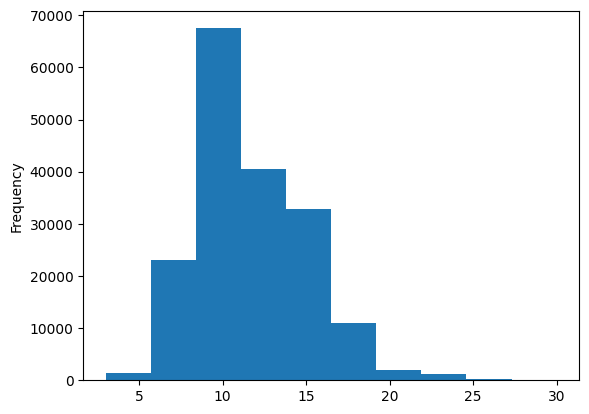

In [15]:
train_df.total_lines.plot.hist()

### Get list of sentences

When we build our deep learning model, one of its main inputs will be a list of strings (the lines of an abstract).

We can get these easily from our DataFrames by calling the tolist() method on our "text" columns.

In [16]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [17]:
train_sentences[:1]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .']

### Make numeric labels (ML models require numeric labels)

We could get away with just making label encoded labels, however, TensorFlow's CategoricalCrossentropy loss function likes to have one hot encoded labels (this will enable us to use label smoothing later on).

In [18]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))
# we had to reshape cuz OHE needs 2D array
train_labels_one_hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [19]:
# Label encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [20]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [21]:
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# **Modelling 🔥🔥🔥🔥**

We'll start by creating a simple baseline model to obtain a score we'll try to beat by building more and more complex models as we move towards replicating the sequence model outlined in Neural networks for joint sentence classification in medical paper abstracts.

## **Model 0:** Baseline ML Model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(X=train_sentences, y = train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [23]:
model_0.score(X = val_sentences, y  = val_labels_encoded)

0.7218323844829869

In [24]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

#####Getting helper funtions

In [25]:
!wget https://raw.githubusercontent.com/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/main/helper_functions.py

--2024-07-11 10:43:07--  https://raw.githubusercontent.com/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10127 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.89K  --.-KB/s    in 0s      

2024-07-11 10:43:07 (71.7 MB/s) - ‘helper_functions.py’ saved [10127/10127]



In [26]:
# Import calculate_results helper function
from helper_functions import calculate_results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

Lets keep in mind

**Baseline Accuracy: 72.18**

## Data Preprocessing for Deep Learning Models

We need to create vectorization and embeddings and create data using tf.data API for faster processing

In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers

We need to pad all sentences to one length in order to send to modelling

In [28]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <BarContainer object of 7 artists>)

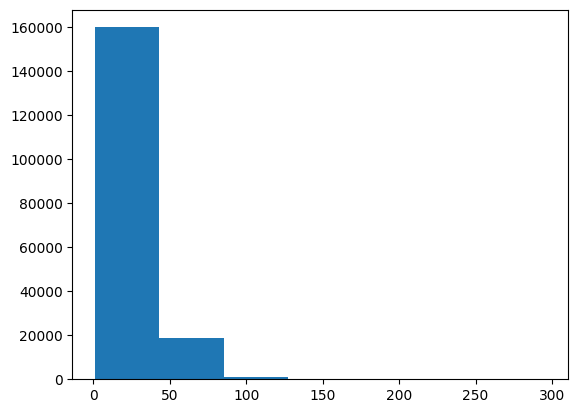

In [29]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 7)

Looks like majority sentences are between 0 and 50 in length.

We can check the 95th percentile of sentence lengths.

In [30]:
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

Looks like 55 is the required number of words in sentence so we will pad the sentences less than 55 words with 0 and sentences more than 55 in length will get truncated.

In [31]:
max(sent_lens)

296

### Create text vectorizer

Section 3.2 of the PubMed 200k RCT paper states the vocabulary size of the PubMed 20k dataset as 68,000. So we'll use that as our max_tokens parameter.

In [32]:
max_tokens = 68000

And since discovered a sentence length of 55 covers 95% of the training sentences, we'll use that as our output_sequence_length parameter.

In [33]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens,
                                    output_sequence_length = 55)

In [34]:
text_vectorizer.adapt(train_sentences)

In [35]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text: {target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer(target_sentence)}")

Text: participants with low cathelicidin had a @ ml lower fev@ compared to higher cathelicidin ( p = @ ) ; this relationship was maintained ( @ ml lower ; p = @ ) after adjusting for demographics , bmi , and smoking .

Length of text: 43

Vectorized text: [  60    7  220 9464   55    8  364  105 1286   34    6   82 9464   14
   23  639   10  863  364  105   14   21 1515   11 2349  456    3  425
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


Exploring our text

In [36]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [37]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Create custom text embedding

In [38]:
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                               output_dim = 128,
                               mask_zero = True,
                               name = "token_embedding")

In [39]:
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
participants with low cathelicidin had a @ ml lower fev@ compared to higher cathelicidin ( p = @ ) ; this relationship was maintained ( @ ml lower ; p = @ ) after adjusting for demographics , bmi , and smoking .

Sentence after vectorization (before embedding):
[[  60    7  220 9464   55    8  364  105 1286   34    6   82 9464   14
    23  639   10  863  364  105   14   21 1515   11 2349  456    3  425
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after embedding:
[[[ 0.03344718  0.02629644 -0.01603702 ... -0.01350624 -0.0151275
    0.02743176]
  [-0.02626109 -0.02218555 -0.0420275  ... -0.01780421  0.02566675
   -0.00691532]
  [ 0.01114994  0.02248241  0.04944516 ... -0.02065555  0.01165488
    0.00298306]
  ...
  [ 0.02365834 -0.04189745 -0.0386912  ...  0.02934525 -0.02775885
    0.0281552 ]
  [ 0.02365834 -0.04189745 -0.0386912  ...  0.02934525 -0.

### Create datasets (as fast as possible)

> The tf.data API provides methods which enable faster data loading.

The main steps we'll want to use with our data is to turn it into a PrefetchDataset of batches.

To create a batched PrefetchDataset we can use the methods `batch()` and `prefetch()`, the parameter `tf.data.AUTOTUNE` will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.

In [40]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [41]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## **Model 1:** Conv1D with token embeddings

In [42]:
inputs = layers.Input(shape = (1,) , dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(token_embeddings)
x  = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes,  activation = "softmax")(x)
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [43]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [44]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch = int(0.1 * len(train_dataset)),
                              epochs = 3,
                              validation_data = valid_dataset,
                              validation_steps = int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 23s 35ms/step - loss: 0.9102 - accuracy: 0.6408 - val_loss: 0.6765 - val_accuracy: 0.7457
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.6572 - accuracy: 0.7562 - val_loss: 0.6274 - val_accuracy: 0.7733
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6178 - accuracy: 0.7732 - val_loss: 0.5953 - val_accuracy: 0.7816


Steps per Epoch
Definition: The number of batches processed before completing one epoch.

Purpose: Allows training on a subset of data per epoch for faster feedback and resource efficiency.

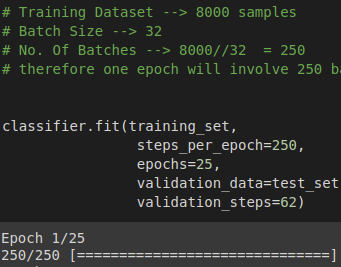



In [45]:
# Continue training for 4 more epochs
model_1_history_continued = model_1.fit(train_dataset,
                                        steps_per_epoch = int(0.1 * len(train_dataset)),
                                        epochs = 7,
                                        initial_epoch = model_1_history.epoch[-1] + 1,
                                        validation_data = valid_dataset,
                                        validation_steps = int(0.1 * len(valid_dataset)))


Epoch 4/7
562/562 [==============================] - 9s 16ms/step - loss: 0.5177 - accuracy: 0.8180 - val_loss: 0.5859 - val_accuracy: 0.7912
Epoch 5/7
562/562 [==============================] - 7s 12ms/step - loss: 0.4566 - accuracy: 0.8395 - val_loss: 0.5938 - val_accuracy: 0.7879
Epoch 6/7
562/562 [==============================] - 7s 13ms/step - loss: 0.4410 - accuracy: 0.8456 - val_loss: 0.6043 - val_accuracy: 0.7799
Epoch 7/7
562/562 [==============================] - 4s 7ms/step - loss: 0.5845 - accuracy: 0.7914 - val_loss: 0.5691 - val_accuracy: 0.7942


Cant se much improvements so we stop here.


In [46]:
# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.5669 - accuracy: 0.7974


[0.5668894052505493, 0.7973983883857727]

In [47]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[5.7658255e-01, 1.2376239e-01, 1.2665381e-01, 7.6851591e-02,
        9.6149623e-02],
       [5.0411922e-01, 2.8354311e-01, 4.8267320e-02, 1.3554512e-01,
        2.8525198e-02],
       [2.3958290e-01, 1.9898959e-03, 9.3377160e-04, 7.5748152e-01,
        1.1958426e-05],
       ...,
       [9.7232014e-06, 1.8750176e-04, 8.4934756e-04, 3.8594681e-06,
        9.9894959e-01],
       [1.4016739e-01, 3.8192514e-01, 8.5489921e-02, 5.2788660e-02,
        3.3962893e-01],
       [5.6232203e-02, 9.0665299e-01, 1.4680096e-02, 2.2005963e-03,
        2.0234138e-02]], dtype=float32)

In [48]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [49]:
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 79.73983847477824,
 'precision': 0.7981777362527064,
 'recall': 0.7973983847477824,
 'f1': 0.7935545034610154}

## **Model 2:** Feature Extraction with Pretrained token embeddings

In [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it mentions they used a [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) as a way to initialise their token embeddings.

In [50]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [51]:
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
needle rotation increases the magnitude of hypoalgesia .

Sentence after embedding:
[ 0.05816362 -0.05107415  0.05870123  0.02122435  0.03469369  0.02148847
  0.02818761 -0.06899417 -0.00554681  0.04278538  0.04157604  0.03017227
  0.01409293 -0.00047562  0.07431327 -0.00268744 -0.04925302 -0.06005758
 -0.05128894  0.02582338 -0.05431647  0.04793194  0.05867303  0.01330288
  0.04620881  0.0252141  -0.0632267  -0.05155329 -0.01449947 -0.0260426 ] (truncated output)...

Length of sentence embedding:
512


In [52]:
# Modelling
inputs = layers.Input(shape= [], dtype = tf.string)
pretrained_embeddings = tf_hub_embedding_layer(inputs)
x = layers.Dense(128,activation = "relu")(pretrained_embeddings)
outputs = layers.Dense(5,activation = "softmax")(x)
model_2 = tf.keras.Model(inputs = inputs,
                         outputs = outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [53]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [54]:
model_2_history = model_2.fit(train_dataset,
            steps_per_epoch = int(0.1 * len(train_dataset)),
            epochs = 7,
            validation_data = valid_dataset,
            validation_steps = int(0.1 * len(valid_dataset))
            )

Epoch 1/7
562/562 [==============================] - 12s 14ms/step - loss: 0.9147 - accuracy: 0.6512 - val_loss: 0.7968 - val_accuracy: 0.6875
Epoch 2/7
562/562 [==============================] - 9s 16ms/step - loss: 0.7682 - accuracy: 0.7018 - val_loss: 0.7561 - val_accuracy: 0.7064
Epoch 3/7
562/562 [==============================] - 9s 16ms/step - loss: 0.7516 - accuracy: 0.7134 - val_loss: 0.7397 - val_accuracy: 0.7138
Epoch 4/7
562/562 [==============================] - 7s 13ms/step - loss: 0.7183 - accuracy: 0.7251 - val_loss: 0.7115 - val_accuracy: 0.7320
Epoch 5/7
562/562 [==============================] - 9s 16ms/step - loss: 0.7260 - accuracy: 0.7210 - val_loss: 0.6912 - val_accuracy: 0.7337
Epoch 6/7
562/562 [==============================] - 9s 16ms/step - loss: 0.7184 - accuracy: 0.7273 - val_loss: 0.6848 - val_accuracy: 0.7327
Epoch 7/7
562/562 [==============================] - 8s 14ms/step - loss: 0.6857 - accuracy: 0.7408 - val_loss: 0.6692 - val_accuracy: 0.7453


In [55]:
history_2_continued = model_2.fit(train_dataset,
            steps_per_epoch = int(0.1 * len(train_dataset)),
            epochs = 10,
            initial_epoch = model_2_history.epoch[-1] + 1,
            validation_data = valid_dataset,
            validation_steps = int(0.1 * len(valid_dataset))
            )

Epoch 8/10
562/562 [==============================] - 9s 16ms/step - loss: 0.6802 - accuracy: 0.7408 - val_loss: 0.6629 - val_accuracy: 0.7437
Epoch 9/10
562/562 [==============================] - 8s 14ms/step - loss: 0.6609 - accuracy: 0.7488 - val_loss: 0.6620 - val_accuracy: 0.7407
Epoch 10/10
562/562 [==============================] - 9s 15ms/step - loss: 0.6589 - accuracy: 0.7481 - val_loss: 0.6628 - val_accuracy: 0.7463


In [56]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 12s 12ms/step - loss: 0.6652 - accuracy: 0.7451


[0.6651833653450012, 0.745101273059845]

In [57]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 11s 11ms/step


array([[4.3330163e-01, 3.6561239e-01, 8.0259441e-04, 1.9635269e-01,
        3.9305966e-03],
       [3.2388687e-01, 5.3060186e-01, 3.3298589e-03, 1.4130430e-01,
        8.7710220e-04],
       [3.8212207e-01, 3.9612360e-02, 2.0633319e-02, 5.4000711e-01,
        1.7625183e-02],
       ...,
       [1.1186955e-03, 1.4208228e-03, 2.3122387e-02, 3.1900386e-04,
        9.7401911e-01],
       [4.4433167e-03, 6.1380032e-02, 1.2360145e-01, 1.4522645e-03,
        8.0912292e-01],
       [1.0807590e-01, 7.8694201e-01, 9.2091277e-02, 1.7304617e-03,
        1.1160418e-02]], dtype=float32)

In [58]:
# Convert the predictions with feature extraction model to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [59]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 74.51012842579108,
 'precision': 0.7435284151360361,
 'recall': 0.7451012842579108,
 'f1': 0.7428447993304679}

## **Model 3**: Conv1D with character embeddings
The [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) paper mentions their model uses a hybrid of token and character embeddings.

In [60]:
def split_chars(text):
  return " ".join(list(text))

split_chars(random_training_sentence)

'n e e d l e   r o t a t i o n   i n c r e a s e s   t h e   m a g n i t u d e   o f   h y p o a l g e s i a   .'

In [61]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chats = [split_chars(sentence) for sentence in test_sentences]

In [62]:
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [63]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <BarContainer object of 7 artists>)

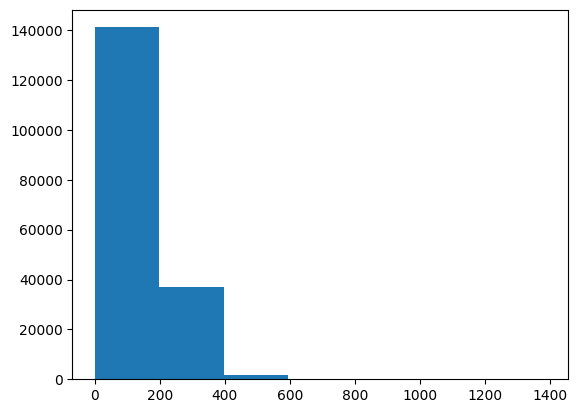

In [64]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins = 7)

Okay, looks like most of our sequences are between 0 and 200 characters long.

In [65]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

We'll set `max_tokens` (the total number of different characters in our sequences) to 28, in other words, 26 letters of the alphabet + space + OOV (out of vocabulary or unknown) tokens.

In [66]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
NUM_CHAR_TOKENS = len(alphabet) +2 # num characters in alphabet + space + OOV token

In [68]:
char_vectorizer = TextVectorization(max_tokens = NUM_CHAR_TOKENS,
                                    output_sequence_length = output_seq_char_len,
                                    standardize = "lower_and_strip_punctuation",
                                    name = "char_vectorizer")

char_vectorizer.adapt(train_chars)

In [69]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [70]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
h o w e v e r   ,   a   s m a l l   b u t   c l i n i c a l l y   s i g n i f i c a n t   m i n o r i t y   o f   p a t i e n t s   r e m a i n e d   s y m p t o m a t i c   a n d   d i s s a t i s f i e d   w i t h   v i s u a l   r e s u l t s   @   t o   @   m o n t h s   a f t e r   s u r g e r y   .

Length of chars: 130

Vectorized chars:
[[13  7 20  2 21  2  8  5  9 15  5 12 12 22 16  3 11 12  4  6  4 11  5 12
  12 19  9  4 18  6  4 17  4 11  5  6  3 15  4  6  7  8  4  3 19  7 17 14
   5  3  4  2  6  3  9  8  2 15  5  4  6  2 10  9 19 15 14  3  7 15  5  3
   4 11  5  6 10 10  4  9  9  5  3  4  9 17  4  2 10 20  4  3 13 21  4  9
  16  5 12  8  2  9 16 12  3  9  3  7 15  7  6  3 13  9  5 17  3  2  8  9
  16  8 18  2  8 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  

Due to the standardize parameter of TextVectorization being "lower_and_strip_punctuation" and the split parameter being "whitespace" by default, symbols (such as @) and spaces are removed.

In [71]:
# Creating a character-level embedding
char_embed = layers.Embedding(input_dim = NUM_CHAR_TOKENS,
                              output_dim = 25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero = False,
                              name = "char_embed"
)

mask_zero=True:
```
When mask_zero is set to True, the embedding layer will not assign an embedding vector to the token 0. Instead, it will mask out these positions, which can be useful if 0 is used as a padding value in sequences.
This means the model will ignore the 0 value during training and evaluation.
```

In [72]:
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
h o w e v e r   ,   a   s m a l l   b u t   c l i n i c a l l y   s i g n i f i c a n t   m i n o r i t y   o f   p a t i e n t s   r e m a i n e d   s y m p t o m a t i c   a n d   d i s s a t i s f i e d   w i t h   v i s u a l   r e s u l t s   @   t o   @   m o n t h s   a f t e r   s u r g e r y   .

Embedded chars (after vectorization and embedding):
[[[ 0.04334049 -0.01760757  0.00567083 ...  0.04293532 -0.04177897
   -0.04194685]
  [ 0.03691931  0.01959599  0.004001   ...  0.00608742  0.01750103
   -0.00276492]
  [ 0.01148404  0.02003833  0.03499946 ... -0.04264519 -0.00272388
   -0.02845566]
  ...
  [ 0.04182067  0.03147698 -0.01639016 ...  0.00279425  0.00235639
   -0.01864133]
  [ 0.04182067  0.03147698 -0.01639016 ...  0.00279425  0.00235639
   -0.01864133]
  [ 0.04182067  0.03147698 -0.01639016 ...  0.00279425  0.00235639
   -0.01864133]]]

Character embedding shape: (1, 290, 25)


## **Model 3:** Conv1D model with character embeddings

In [73]:
inputs = layers.Input(shape = (1,) ,dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size = 5, padding = "same", activation = "relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation = "softmax")(x)
model_3 = tf.keras.Model(inputs = inputs, outputs = outputs,
                         name = "model_3_conv1D_char_embeddings")

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [74]:
model_3.summary()

Model: "model_3_conv1D_char_embeddings"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 

Before fitting out model on the data, we'll create a char-level batched `PrefetchedDataser`'s

In [75]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [76]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 5s 7ms/step - loss: 1.2693 - accuracy: 0.4854 - val_loss: 1.0604 - val_accuracy: 0.5834
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0153 - accuracy: 0.5917 - val_loss: 0.9467 - val_accuracy: 0.6170
Epoch 3/3
562/562 [==============================] - 4s 7ms/step - loss: 0.9322 - accuracy: 0.6351 - val_loss: 0.8634 - val_accuracy: 0.6656


In [77]:
history_model_3_continued =  model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=7,
                              initial_epoch = model_3_history.epoch[-1] +1,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 4/7
562/562 [==============================] - 3s 6ms/step - loss: 0.8757 - accuracy: 0.6635 - val_loss: 0.8300 - val_accuracy: 0.6918
Epoch 5/7
562/562 [==============================] - 3s 6ms/step - loss: 0.8459 - accuracy: 0.6753 - val_loss: 0.8241 - val_accuracy: 0.6752
Epoch 6/7
562/562 [==============================] - 4s 7ms/step - loss: 0.8252 - accuracy: 0.6835 - val_loss: 0.7893 - val_accuracy: 0.6968
Epoch 7/7
562/562 [==============================] - 4s 6ms/step - loss: 0.8138 - accuracy: 0.6857 - val_loss: 0.7800 - val_accuracy: 0.7094


In [78]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.8013 - accuracy: 0.6965


[0.8012577295303345, 0.6964782476425171]

In [79]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.40888372, 0.4878328 , 0.01460326, 0.073493  , 0.01518717],
       [0.3789294 , 0.48668274, 0.00380944, 0.12665974, 0.00391858],
       [0.21477337, 0.08658706, 0.07601596, 0.6153196 , 0.00730402],
       ...,
       [0.01211478, 0.02709824, 0.12755172, 0.00466241, 0.8285729 ],
       [0.01940325, 0.13636513, 0.3791145 , 0.01573808, 0.4493791 ],
       [0.33296612, 0.6063218 , 0.0281179 , 0.0253713 , 0.00722292]],
      dtype=float32)

In [80]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 1])>

In [81]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 69.6478220574606,
 'precision': 0.7000518103082259,
 'recall': 0.6964782205746061,
 'f1': 0.6893238578164691}

## **Model 4:** Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In [82]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [83]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

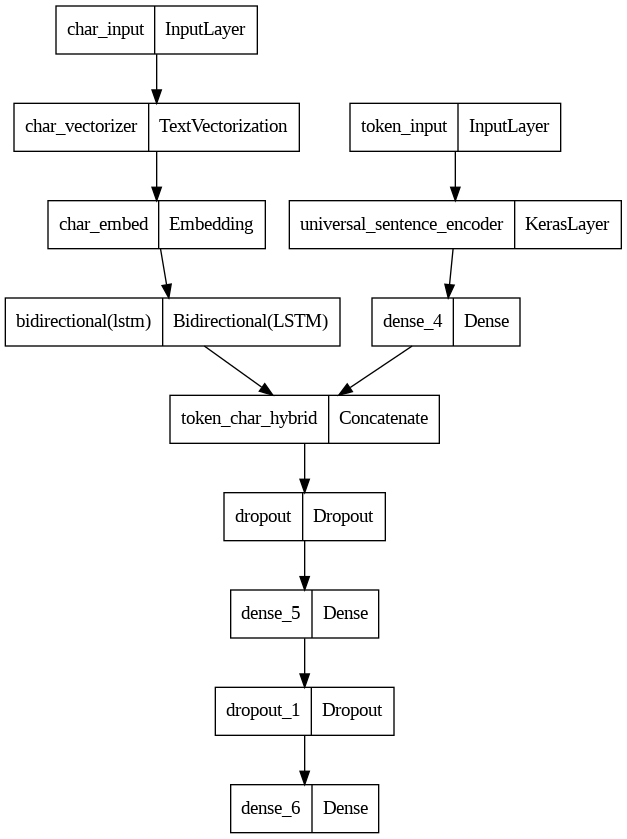

In [84]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [91]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but I am using Adam
                metrics=["accuracy"])

And again, to keep our experiments fast, we'll fit our token-character-hybrid model on 10% of training and validate on 10% of validation batches. However, the difference with this model is that it requires two inputs, token-level sequences and character-level sequences.

We can do this by create a `tf.data.Dataset` with a tuple as it's first input, for example:
* `((token_data, char_data), (label))`

Let's see it in action.

##### Combining token and character data into a `tf.data` dataset

In [92]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [93]:
# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [94]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [95]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 29s 42ms/step - loss: 0.9215 - accuracy: 0.6379 - val_loss: 0.7690 - val_accuracy: 0.7064
Epoch 2/3
562/562 [==============================] - 22s 39ms/step - loss: 0.7931 - accuracy: 0.6931 - val_loss: 0.7125 - val_accuracy: 0.7327
Epoch 3/3
562/562 [==============================] - 20s 36ms/step - loss: 0.7651 - accuracy: 0.7077 - val_loss: 0.6900 - val_accuracy: 0.7394


In [96]:
# Fit the model on tokens and chars
model_4_history_continued = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                                        initial_epoch = model_4_history.epoch[-1] + 1,
                              epochs=10,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 4/10
562/562 [==============================] - 20s 36ms/step - loss: 0.7412 - accuracy: 0.7180 - val_loss: 0.6698 - val_accuracy: 0.7473
Epoch 5/10
562/562 [==============================] - 21s 38ms/step - loss: 0.7047 - accuracy: 0.7280 - val_loss: 0.6470 - val_accuracy: 0.7540
Epoch 6/10
562/562 [==============================] - 20s 36ms/step - loss: 0.7079 - accuracy: 0.7293 - val_loss: 0.6397 - val_accuracy: 0.7530
Epoch 7/10
562/562 [==============================] - 20s 35ms/step - loss: 0.7068 - accuracy: 0.7323 - val_loss: 0.6321 - val_accuracy: 0.7590
Epoch 8/10
562/562 [==============================] - 22s 40ms/step - loss: 0.7187 - accuracy: 0.7283 - val_loss: 0.6278 - val_accuracy: 0.7596
Epoch 9/10
562/562 [==============================] - 22s 39ms/step - loss: 0.7136 - accuracy: 0.7255 - val_loss: 0.6294 - val_accuracy: 0.7636
Epoch 10/10
562/562 [==============================] - 22s 39ms/step - loss: 0.6889 - accuracy: 0.7357 - val_loss: 0.6198 - val_accuracy

In [98]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 20s 21ms/step - loss: 0.6208 - accuracy: 0.7647


[0.6208102107048035, 0.7646961212158203]

In [99]:
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 20s 20ms/step


array([[5.7103533e-01, 2.4548696e-01, 1.5571713e-03, 1.7710783e-01,
        4.8127468e-03],
       [5.0654864e-01, 3.9802375e-01, 2.1845545e-03, 9.2512362e-02,
        7.3073304e-04],
       [4.1596583e-01, 9.2927935e-03, 1.6761586e-02, 5.5547994e-01,
        2.4998386e-03],
       ...,
       [5.1127176e-06, 7.4098702e-05, 1.0789619e-02, 1.4780607e-06,
        9.8912966e-01],
       [9.8688332e-03, 4.9504679e-02, 1.5779497e-01, 3.8604469e-03,
        7.7897102e-01],
       [8.3289035e-02, 8.9116365e-01, 2.0314459e-02, 1.9091229e-03,
        3.3236896e-03]], dtype=float32)

In [100]:
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [101]:
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.46961472262677,
 'precision': 0.7626890375500404,
 'recall': 0.7646961472262677,
 'f1': 0.7602735786048677}

## **Model 5:** Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

Generally Abstracts typically come in a sequential order, such as:
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...

In [102]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


We can make use of the `"line_number"` ans `"total_lines"`to use as positional embedding.

We need to one hot encode them or else our model might think that 1,2,3,4... is some kind of order.

In [103]:
train_df["line_number"].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

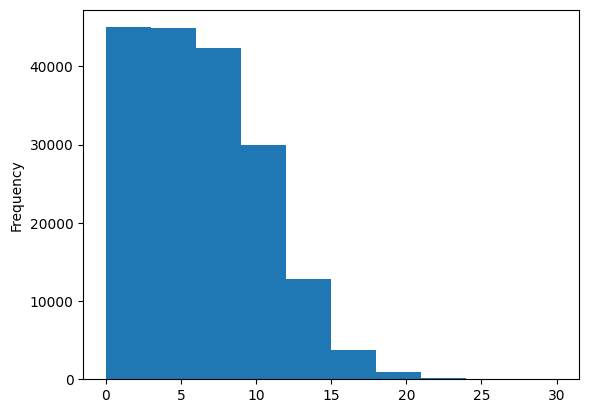

In [104]:
train_df.line_number.plot.hist()

In [105]:
np.percentile(train_df.line_number, 95)

13.0

We will consider that the majority of lines have a position of 15 or less to minimize loss of information.

In [106]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

Setting the `depth` parameter of `tf.one_hot` to 15 means any sample with a `"line_number"` value of over 15 gets set to a tensor of all 0's, where as any sample with a `"line_number"` of under 15 gets turned into a tensor of all 0's but with a 1 at the index equal to the `"line_number"` value.

In [108]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [109]:
train_df["total_lines"].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

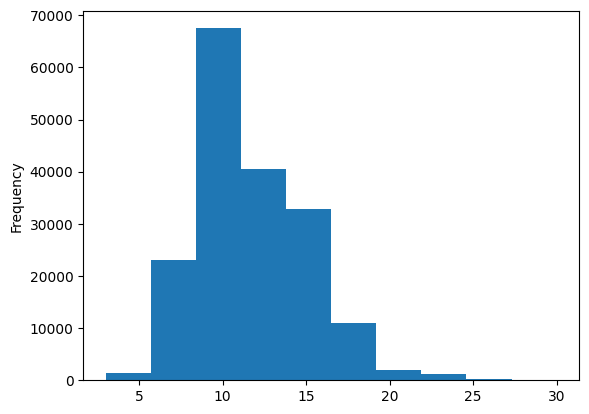

In [110]:
train_df.total_lines.plot.hist();

In [111]:
np.percentile(train_df.total_lines, 98)

20.0

In [112]:
# Useing TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)


train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

### Building a tribrif embedding model

**Steps:**

> 1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Create a `"line_number"` model (takes in one-hot-encoded `"line_number"` tensor and passes it through a non-linear layer)
4. Create a `"total_lines"` model (takes in one-hot-encoded `"total_lines"` tensor and passes it through a non-linear layer)
5. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding
7. Create an output layer to accept the tribrid embedding and output predicted label probabilities
8. Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [117]:
# 1. Token inputs
token_inputs = layers.Input(shape = [], dtype = tf.string, name = "token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128,activation = "relu")(token_embeddings)
token_model = tf.keras.Model(inputs = token_inputs,
                             outputs = token_outputs)

# 2. Char inputs
char_inputs = layers.Input(shape = (1,), dtype = tf.string, name ="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs = char_inputs,
                            outputs = char_bi_lstm)

# 3. Line numbers inputs
line_number_inputs = layers.Input(shape = (15,), dtype = tf.int32, name = "line_number_inputs")
x= layers.Dense(32,activation = "relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs = line_number_inputs,
                                   outputs = x)

# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype = tf.int32, name = "total_lines_inputs")
y = layers.Dense(128, activation = "relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs = total_lines_inputs,
                                  outputs = y)

# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name = "token_char_hybrid_embedding")([token_model.output,
                                                                                char_model.output])
z = layers.Dense(256, activation = "relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)   # This is defined in the paper

# 6. Combine positional embeddings with token and char embeddings into a tribrid embedding
z = layers.Concatenate(name = "token_char_positional_embeding")([line_number_model.output,
                                                                total_line_model.output,
                                                                 z])

# 7. Create output layer
output_layer = layers.Dense(5, activation = "softmax", name = 'output_layer')(z)

# 8. Put all model together
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name = "model_5")

#**** Remember the above input sequence it is important, used later on.


In [118]:
model_5.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

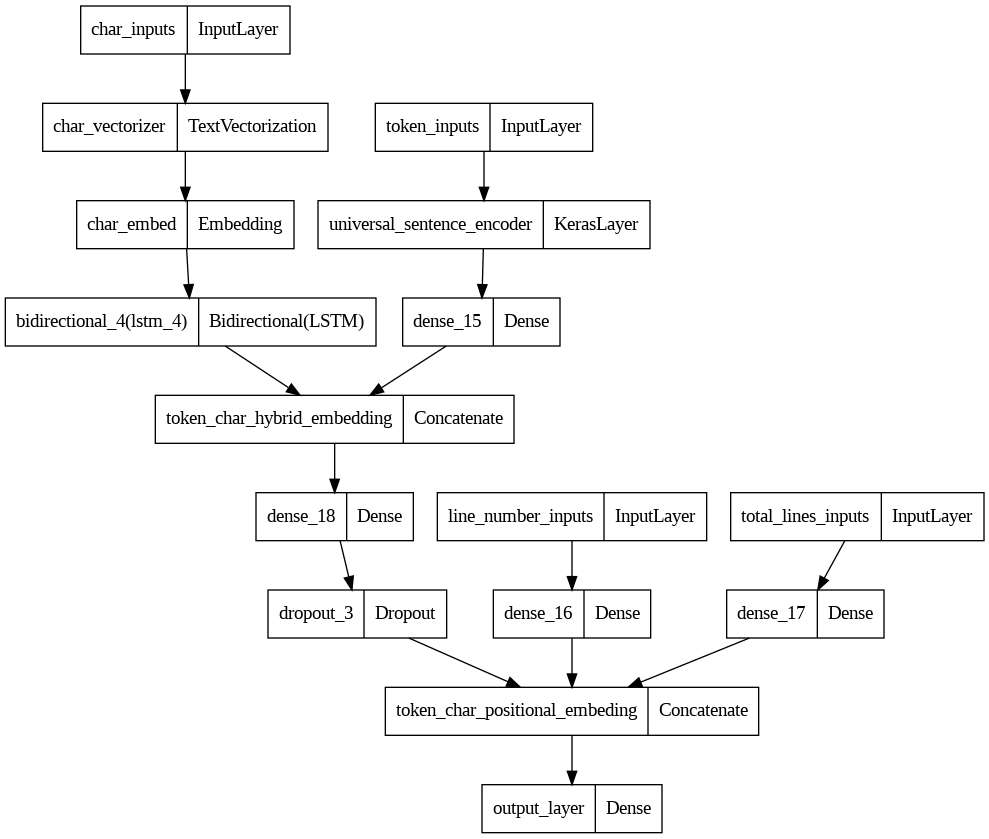

In [119]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

**Author Model:**

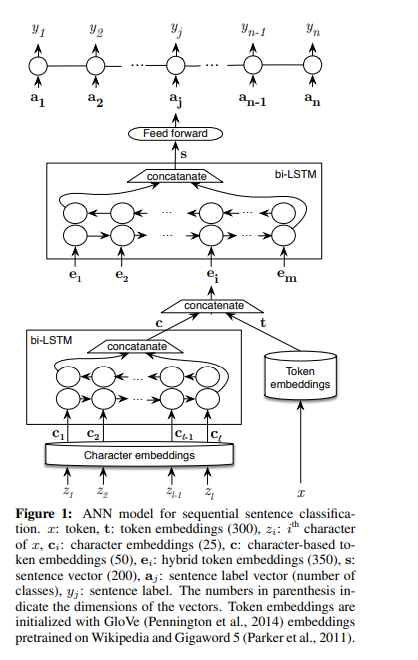

Our model is looking very similar to the Author model but there are few differences:

```
- We used pretrained TensorFlow Hub token embeddings instead of GloVr embeddings.
- We're using a Dense layer on top of our token-character hybrid embeddings instead of a bi-LSTM layer.
- Section 3.1.3 of the paper mentions a label sequence optimization layer (which helps to make sure sequence labels come out in a respectable order) but it isn't shown in Figure 1. To makeup for the lack of this layer in our model, we've created the positional embeddings layers.
- Section 4.2 of the paper mentions the token and character embeddings are updated during training, our pretrained TensorFlow Hub embeddings remain frozen.
- The paper used the SGD optimizer, we stick with Adam.
```

In [121]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7ce47d8930a0> True
<keras.src.engine.input_layer.InputLayer object at 0x7ce47d8925f0> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7ce485b438e0> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7ce5fb0a0c70> False
<keras.src.layers.core.embedding.Embedding object at 0x7ce485b74f70> True
<keras.src.layers.core.dense.Dense object at 0x7ce47d8934f0> True
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7ce47d8d2ec0> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7ce47d47ff40> True
<keras.src.engine.input_layer.InputLayer object at 0x7ce47d8e5fc0> True
<keras.src.engine.input_layer.InputLayer object at 0x7ce47d727ac0> True
<keras.src.layers.core.dense.Dense object at 0x7ce47d45cd30> True
<keras.src.layers.core.dense.Dense object at 0x7ce5904a8310> True
<keras.src.layers.core.dense.Dense object at 0x7ce47d726e00> True
<keras.src.layers.regularization.dropout.

In [122]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

 Label smoothing helps to regularize our model (prevent overfitting) by making sure it doesn't get too focused on applying one particular label to a sample.

For example, instead of having an output prediction of:
* `[0.0, 0.0, 1.0, 0.0, 0.0]` for a sample (the model is very confident the right label is index 2).

It's predictions will get smoothed to be something like:
* `[0.01, 0.01, 0.096, 0.01, 0.01]` giving a small activation to each of the other labels, in turn, hopefully improving generalization.

### Creating tribrid embedding datasets and fir tribrid model

This time our model requires four feature inputs:
1. Train line numbers one-hot tensor (`train_line_numbers_one_hot`)
2. Train total lines one-hot tensor (`train_total_lines_one_hot`)
3. Token-level sequences tensor (`train_sentences`)
4. Char-level sequences tensor (`train_chars`)

We can pass these as tuples to our `tf.data.Dataset.from_tensor_slices()` method to create appropriately shaped and batched `PrefetchedDataset`'s.

In [124]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [125]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 36s 47ms/step - loss: 1.1012 - accuracy: 0.7208 - val_loss: 0.9858 - val_accuracy: 0.8059
Epoch 2/3
562/562 [==============================] - 35s 62ms/step - loss: 0.9654 - accuracy: 0.8174 - val_loss: 0.9474 - val_accuracy: 0.8295
Epoch 3/3
562/562 [==============================] - 38s 69ms/step - loss: 0.9483 - accuracy: 0.8257 - val_loss: 0.9399 - val_accuracy: 0.8331


In [126]:
# Fit the token, char and positional embedding model
history_model_5_continued = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              initial_epoch = history_model_5.epoch[-1] + 1,
                              epochs=7,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 4/7
562/562 [==============================] - 26s 45ms/step - loss: 0.9426 - accuracy: 0.8299 - val_loss: 0.9309 - val_accuracy: 0.8391
Epoch 5/7
562/562 [==============================] - 26s 46ms/step - loss: 0.9231 - accuracy: 0.8465 - val_loss: 0.9214 - val_accuracy: 0.8461
Epoch 6/7
562/562 [==============================] - 24s 43ms/step - loss: 0.9199 - accuracy: 0.8455 - val_loss: 0.9242 - val_accuracy: 0.8391
Epoch 7/7
562/562 [==============================] - 23s 42ms/step - loss: 0.9242 - accuracy: 0.8440 - val_loss: 0.9183 - val_accuracy: 0.8348


In [127]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 39s 40ms/step


array([[0.67388475, 0.07801281, 0.01918177, 0.21350533, 0.0154153 ],
       [0.716781  , 0.08058207, 0.05435563, 0.13840929, 0.00987201],
       [0.4630309 , 0.07677636, 0.10832037, 0.29252398, 0.05934829],
       ...,
       [0.02527552, 0.08316143, 0.03608194, 0.02652658, 0.8289545 ],
       [0.02427121, 0.3122345 , 0.06981818, 0.02701273, 0.5666634 ],
       [0.0587442 , 0.8569237 , 0.03547377, 0.0164867 , 0.03237167]],
      dtype=float32)

In [128]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 1])>

In [129]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 84.13875281345162,
 'precision': 0.8489288929924241,
 'recall': 0.8413875281345161,
 'f1': 0.8357048460291022}

## **Compare Model Results**

In [130]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,79.739838,0.798178,0.797398,0.793555
pretrained_token_embed,74.510128,0.743528,0.745101,0.742845
custom_char_embed_conv1d,69.647822,0.700052,0.696478,0.689324
hybrid_char_token_embed,76.469615,0.762689,0.764696,0.760274
tribrid_pos_char_token_embed,84.138753,0.848929,0.841388,0.835705


In [131]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

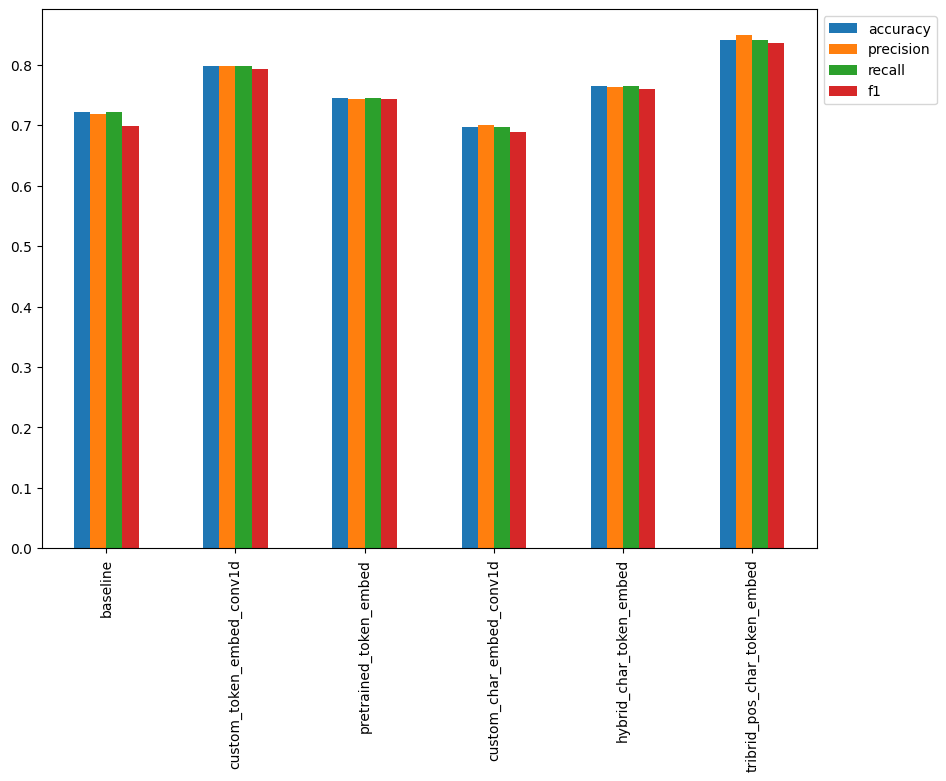

In [132]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

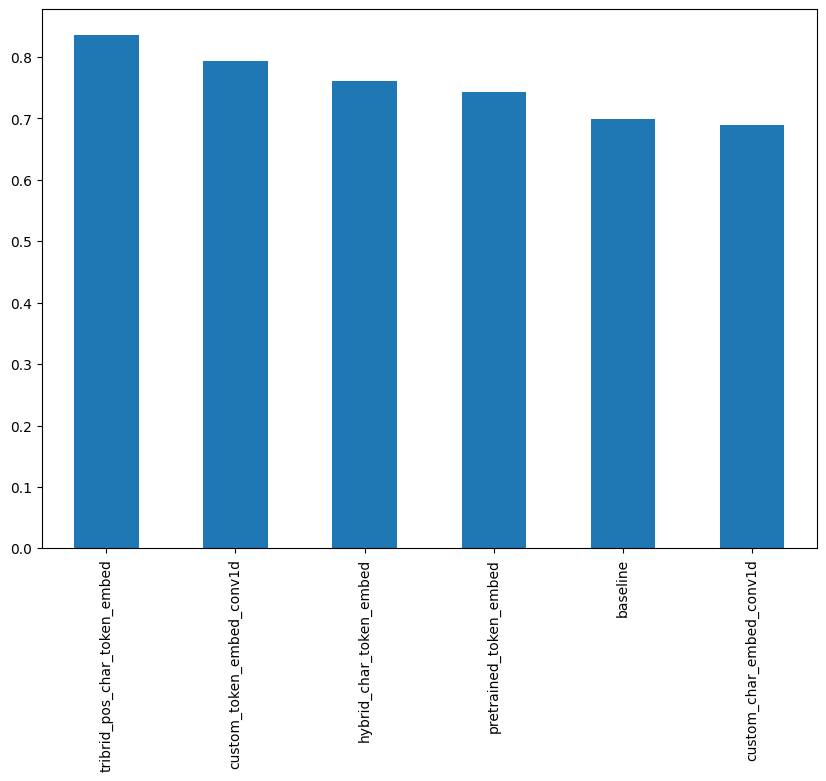

In [133]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

### **Saving Model**

In [138]:
model_5.save("PubMed_best_model")

In [140]:
!cp PubMed_best_model -r /content/drive/MyDrive/PubMed

In [141]:
# Import TensorFlow model dependencies (if needed) - https://github.com/tensorflow/tensorflow/issues/38250
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

model_path = "/content/drive/MyDrive/PubMed"

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model(model_path)#,
                                          # Note: with TensorFlow 2.5+ if your SavedModel has a keras_metadata.pb file
                                          # (created when using model.save()), you shouldn't need the custom_objects
                                          # parameter. I'm leaving the code below here in case you do.
                                          # custom_objects={"TextVectorization": TextVectorization, # required for char vectorization
                                          #                 "KerasLayer": hub.KerasLayer}) # required for token embedding

In [142]:
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 [==============================] - 36s 31ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 2, 2, 4, 4, 4, 4, 1])>

In [143]:
loaded_model_results = calculate_results(val_labels_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 84.13875281345162,
 'precision': 0.8489288929924241,
 'recall': 0.8413875281345161,
 'f1': 0.8357048460291022}

In [144]:
loaded_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_inputs[0][0]']  

## **Model Evaluation**

**Author Results:**

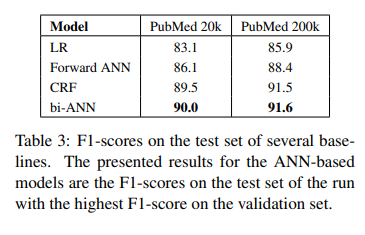

We will try to beat these results

In [146]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chats))   # MADE TYPO EARLIER
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [147]:
# Make predictions on the test dataset
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 [==============================] - 28s 30ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 2, 2, 2, 4, 4, 4, 1, 1, 0])>

In [148]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_labels_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 83.85266301642609,
 'precision': 0.8441618615184111,
 'recall': 0.8385266301642609,
 'f1': 0.8328835121522784}

It seems our best model is little off from the Author model in terms of F-1 Score.

This is mainly because:
- We haven't fine-tuned our pretrained embeddings (the paper fine-tunes GloVe embeddings).
- We used only 10 percent of batches per epoch during training.
- We didnt train our models for longer time.

## Finding most wrong predictions

In [149]:
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

['BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESUL

In [150]:
# Creating prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,target,text,line_number,total_lines,prediction,pred_prob,correct
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8,BACKGROUND,0.386301,True
1,RESULTS,a post hoc analysis was conducted with the use...,1,8,METHODS,0.503579,False
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8,METHODS,0.821017,False
3,RESULTS,survival analyses were used to assess the asso...,3,8,METHODS,0.780520,False
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8,RESULTS,0.711772,True
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8,RESULTS,0.837061,True
6,RESULTS,multivariable analyses revealed that patients ...,6,8,RESULTS,0.526067,True
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8,CONCLUSIONS,0.511523,True
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8,CONCLUSIONS,0.521537,True
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.731827,True


In [152]:
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,target,text,line_number,total_lines,prediction,pred_prob,correct
8545,METHODS,pretest-posttest .,1,11,BACKGROUND,0.966634,False
13874,CONCLUSIONS,symptom outcomes will be assessed and estimate...,4,6,METHODS,0.937137,False
3573,RESULTS,a cluster randomised trial was implemented wit...,3,16,METHODS,0.935187,False
18720,RESULTS,non-diffuse-trickling '' ) .,8,15,BACKGROUND,0.920087,False
2388,RESULTS,the primary endpoint is the cumulative three-y...,4,13,METHODS,0.913187,False
...,...,...,...,...,...,...,...
24246,BACKGROUND,we conducted a randomized controlled trial of ...,2,13,METHODS,0.839143,False
6457,OBJECTIVE,"unfortunately , this dietary modification may ...",1,17,BACKGROUND,0.838858,False
15091,RESULTS,"we conducted a multicentre , randomized , cont...",3,9,METHODS,0.838341,False
2605,RESULTS,"circulating epc ( cells positive for cd@ , cd@...",4,10,METHODS,0.838339,False


In [153]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: METHODS, Pred: BACKGROUND, Prob: 0.9666336178779602, Line number: 1, Total lines: 11

Text:
pretest-posttest .

-----

Target: CONCLUSIONS, Pred: METHODS, Prob: 0.9371373653411865, Line number: 4, Total lines: 6

Text:
symptom outcomes will be assessed and estimates of cost-effectiveness made .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9351872205734253, Line number: 3, Total lines: 16

Text:
a cluster randomised trial was implemented with @,@ children in @ government primary schools on the south coast of kenya in @-@ .

-----

Target: RESULTS, Pred: BACKGROUND, Prob: 0.9200869202613831, Line number: 8, Total lines: 15

Text:
non-diffuse-trickling '' ) .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9131866097450256, Line number: 4, Total lines: 13

Text:
the primary endpoint is the cumulative three-year hiv incidence .

-----

Target: RESULTS, Pred: METHODS, Prob: 0.9114668965339661, Line number: 4, Total lines: 13

Text:
baseline measures included sociodemographics , s

### Working with example abstract

In [155]:
import json
# Download and open example abstracts (copy and pasted from PubMed)
!wget https://raw.githubusercontent.com/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/main/example_abstracts.json
with open("example_abstracts.json", "r") as f:
  example_abstracts = json.load(f)

example_abstracts

--2024-07-11 12:20:35--  https://raw.githubusercontent.com/yashfirkedata/NLP-Replicating-PubMed-200k-RCT-Paper/main/example_abstracts.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6737 (6.6K) [text/plain]
Saving to: ‘example_abstracts.json.1’

example_abstracts.j 100%[===================>]   6.58K  --.-KB/s    in 0s      

2024-07-11 12:20:35 (44.0 MB/s) - ‘example_abstracts.json.1’ saved [6737/6737]



[{'abstract': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs. Participants were randomly assigned to treatment or wait-list conditions. Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language. A response-cost program was applied to reduce problem behaviors and foster skills acquisition. Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures). Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents. High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity. Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.',
  'source': 'https://pubmed.ncbi.nlm.nih.gov/20232240/',
  'details': 'RCT of a manualiz

In [156]:
abstracts = pd.DataFrame(example_abstracts)
abstracts

,abstract,source,details
0,This RCT examined the efficacy of a manualized...,https://pubmed.ncbi.nlm.nih.gov/20232240/,RCT of a manualized social treatment for high-...
1,Postpartum depression (PPD) is the most preval...,https://pubmed.ncbi.nlm.nih.gov/28012571/,Formatting removed (can be used to compare mod...
2,"Mental illness, including depression, anxiety ...",https://pubmed.ncbi.nlm.nih.gov/28942748/,Effect of nutrition on mental health
3,Hepatitis C virus (HCV) and alcoholic liver di...,https://pubmed.ncbi.nlm.nih.gov/22244707/,Baclofen promotes alcohol abstinence in alcoho...


Now we've downloaded some example abstracts, let's see how one of them goes with our trained model.

First, we'll need to parse it using spaCy to turn it from a big chunk of text into sentences.

In [157]:
from spacy.lang.en import English
nlp = English()

sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

doc = nlp(example_abstracts[0]["abstract"])
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
abstract_lines

['This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
 'Participants were randomly assigned to treatment or wait-list conditions.',
 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
 'High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.',
 'Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.']

In [158]:
# Get total number of lines
total_lines_in_sample = len(abstract_lines)

# Go through each line in abstract and create a list of dictionaries containing features for each line
sample_lines = []
for i, line in enumerate(abstract_lines):
  sample_dict = {}
  sample_dict["text"] = str(line)
  sample_dict["line_number"] = i
  sample_dict["total_lines"] = total_lines_in_sample - 1
  sample_lines.append(sample_dict)
sample_lines

[{'text': 'This RCT examined the efficacy of a manualized social intervention for children with HFASDs.',
  'line_number': 0,
  'total_lines': 7},
 {'text': 'Participants were randomly assigned to treatment or wait-list conditions.',
  'line_number': 1,
  'total_lines': 7},
 {'text': 'Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.',
  'line_number': 2,
  'total_lines': 7},
 {'text': 'A response-cost program was applied to reduce problem behaviors and foster skills acquisition.',
  'line_number': 3,
  'total_lines': 7},
 {'text': 'Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).',
  'line_number': 4,
  'total_lines': 7},
 {'text': 'Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.',
  'line_number': 5,
  'total_lines': 7},
 {'text'

Now we've got "line_number" and "total_lines" values, we can one-hot encode them with tf.one_hot just like we did with our training dataset (using the same values for the depth parameter).

In [160]:
# Get all line_number values from sample abstract
test_abstract_line_numbers = [line["line_number"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_line_numbers_one_hot = tf.one_hot(test_abstract_line_numbers, depth=15)
test_abstract_line_numbers_one_hot

<tf.Tensor: shape=(8, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [161]:
# Get all total_lines values from sample abstract
test_abstract_total_lines = [line["total_lines"] for line in sample_lines]
# One-hot encode to same depth as training data, so model accepts right input shape
test_abstract_total_lines_one_hot = tf.one_hot(test_abstract_total_lines, depth=20)
test_abstract_total_lines_one_hot

<tf.Tensor: shape=(8, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [162]:
# Split abstract lines into characters
abstract_chars = [split_chars(sentence) for sentence in abstract_lines]
abstract_chars

['T h i s   R C T   e x a m i n e d   t h e   e f f i c a c y   o f   a   m a n u a l i z e d   s o c i a l   i n t e r v e n t i o n   f o r   c h i l d r e n   w i t h   H F A S D s .',
 'P a r t i c i p a n t s   w e r e   r a n d o m l y   a s s i g n e d   t o   t r e a t m e n t   o r   w a i t - l i s t   c o n d i t i o n s .',
 'T r e a t m e n t   i n c l u d e d   i n s t r u c t i o n   a n d   t h e r a p e u t i c   a c t i v i t i e s   t a r g e t i n g   s o c i a l   s k i l l s ,   f a c e - e m o t i o n   r e c o g n i t i o n ,   i n t e r e s t   e x p a n s i o n ,   a n d   i n t e r p r e t a t i o n   o f   n o n - l i t e r a l   l a n g u a g e .',
 'A   r e s p o n s e - c o s t   p r o g r a m   w a s   a p p l i e d   t o   r e d u c e   p r o b l e m   b e h a v i o r s   a n d   f o s t e r   s k i l l s   a c q u i s i t i o n .',
 'S i g n i f i c a n t   t r e a t m e n t   e f f e c t s   w e r e   f o u n d   f o r   f i v e   o f   s e v e n   p 

In [163]:
# Make predictions on sample abstract features
%%time
test_abstract_pred_probs = loaded_model.predict(x=(test_abstract_line_numbers_one_hot,
                                                   test_abstract_total_lines_one_hot,
                                                   tf.constant(abstract_lines),
                                                   tf.constant(abstract_chars)))
test_abstract_pred_probs

1/1 [==============================] - 2s 2s/step
CPU times: user 2.22 s, sys: 9.52 ms, total: 2.23 s
Wall time: 2.33 s


array([[0.4060511 , 0.09629229, 0.04896314, 0.40171757, 0.04697596],
       [0.0611652 , 0.0320146 , 0.7828117 , 0.07193739, 0.05207102],
       [0.09331694, 0.03186871, 0.68590885, 0.09481996, 0.09408556],
       [0.11355519, 0.15227626, 0.5609014 , 0.06748316, 0.10578398],
       [0.05615742, 0.06880394, 0.2905771 , 0.04393661, 0.5405249 ],
       [0.03269489, 0.06450815, 0.56436867, 0.03729321, 0.3011351 ],
       [0.02182689, 0.09948017, 0.0764364 , 0.02315306, 0.77910346],
       [0.01204008, 0.1269412 , 0.31099305, 0.02468053, 0.52534515]],
      dtype=float32)

In [164]:
# Turn prediction probabilities into prediction classes
test_abstract_preds = tf.argmax(test_abstract_pred_probs, axis=1)
test_abstract_preds

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([0, 2, 2, 2, 4, 2, 4, 4])>

In [165]:
# Turn prediction class integers into string class names
test_abstract_pred_classes = [label_encoder.classes_[i] for i in test_abstract_preds]
test_abstract_pred_classes

['BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS']

In [166]:
# Visualize abstract lines and predicted sequence labels
for i, line in enumerate(abstract_lines):
  print(f"{test_abstract_pred_classes[i]}: {line}")

BACKGROUND: This RCT examined the efficacy of a manualized social intervention for children with HFASDs.
METHODS: Participants were randomly assigned to treatment or wait-list conditions.
METHODS: Treatment included instruction and therapeutic activities targeting social skills, face-emotion recognition, interest expansion, and interpretation of non-literal language.
METHODS: A response-cost program was applied to reduce problem behaviors and foster skills acquisition.
RESULTS: Significant treatment effects were found for five of seven primary outcome measures (parent ratings and direct child measures).
METHODS: Secondary measures based on staff ratings (treatment group only) corroborated gains reported by parents.
RESULTS: High levels of parent, child and staff satisfaction were reported, along with high levels of treatment fidelity.
RESULTS: Standardized effect size estimates were primarily in the medium and large ranges and favored the treatment group.


# **Thank You**